In [1]:

# Pandas and Numpy for data structures and util fucntions
import scipy as sp
import numpy as np
import pandas as pd
from numpy.random import rand
pd.options.display.max_colwidth = 600

# Scikit Imports
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split

import cnn_utils as utils
from model_evaluation_utils import get_metrics

# Matplot Imports
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
%matplotlib inline

# pandas display data frames as tables
from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
np.random.seed(1337)
from keras import callbacks
from keras import optimizers
#from keras.datasets import cifar10
from keras.engine import Model
from keras.applications import vgg16 as vgg
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import Sequential,  Model, model_from_json
from keras.optimizers import RMSprop,Adam,SGD
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from keras.wrappers.scikit_learn import KerasClassifier
from livelossplot.keras import PlotLossesCallback
import efficientnet.keras as efn
import h5py, glob, re
import os

Using TensorFlow backend.


Number of training samples:  1841
Number of test samples:  527
y = 11
number of training examples = 1841
number of test examples = 527
X_train shape: (1841, 128, 128, 3)
Y_train shape: (1841, 20)
X_test shape: (527, 128, 128, 3)
Y_test shape: (527, 20)


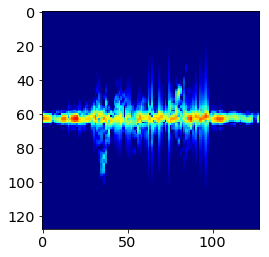

In [3]:
import h5py
hdf5_path = 'native vs imitation/All_imitation.hdf5' 
#hdf5_path = 'tobb_dataset_128x128.hdf5'
dataset = h5py.File(hdf5_path, "r")



Y_test_orig = np.array(dataset["test_labels"])
Y_train_orig = np.array(dataset["train_labels"])
Y_val_orig = np.array(dataset["valid_labels"])

X_train_orig = np.array(dataset["train_img"])
X_test_orig = np.array(dataset["test_img"])
X_val_orig = np.array(dataset["valid_img"])

print('Number of training samples: ', len(X_train_orig))
print('Number of test samples: ', len(X_test_orig))

# Example of a picture
index = 14
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[index])))


X_train = X_train_orig/255.
X_test = X_test_orig/255.
X_val  = X_val_orig/255
#X_train, X_val, y_train, y_val = train_test_split(X_train, 
#                                                  Y_train_orig, 
#                                                  test_size=0.15, 
#                                                 stratify=np.array(Y_train_orig), 
#                                                  random_state=42)


NUM_CLASSES=20;

Y_train = np_utils.to_categorical(Y_train_orig, NUM_CLASSES)
Y_val = np_utils.to_categorical(Y_val_orig, NUM_CLASSES)
Y_test = np_utils.to_categorical(Y_test_orig, NUM_CLASSES)
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

In [4]:
radar = 0 # '0' 4ghz, '1' 10ghz, '2' 24 ghz, or '3' 77
# model_addr = glob.glob('models/88x120 CAE/New Models Excel/*.json')
# weight_addr = glob.glob('models/88x120 CAE/New Models Excel/*.h5')
# model_addr = glob.glob('models/GAN/*.json')
# weight_addr = glob.glob('models/GAN/*.h5')
model_addr = glob.glob('native vs imitation/*.json')
#weight_addr = glob.glob('models/128x128/Auto/Selected Models/*.h5')
#print(model_addr)
#print(weight_addr)
model_file = model_addr[radar]
#weights_file = weight_addr[radar]

json_file = open(model_file, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
opt = SGD(lr=0.0001, momentum=0.9, decay=1e-6)
loaded_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#history = loaded_model.fit(X_train, Y_train, epochs = 50, validation_data = (X_test,Y_test),  batch_size = 16, verbose=1)


<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x7f4cd435eba8>>

In [5]:
loaded_model.summary()

Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_80 (Model)             (None, 4, 4, 128)         2967040   
_________________________________________________________________
flatten_79 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_235 (Dense)            (None, 256)               524544    
_________________________________________________________________
dropout_157 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_236 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_158 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_237 (Dense)            (None, 11)              

In [ ]:


model = Sequential()
# for layer in loaded_model.layers[:-2]: # go through until last layer
#     model.add(layer)
# model.add(Dense(20, activation='relu'))
# model.add(Activation('softmax'))
im_width = 128
im_height = 128
inChannel = 3
input_img = Input(shape = (im_width, im_height, inChannel)) 
model2 = Model(input_img , outputs=loaded_model.layers[:-2].output)
model.add(model2)
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))
optim = Adam(lr=0.0002)
model.summary()
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, Y_train, epochs = 50, validation_data = (X_test,Y_test),  batch_size = 16, verbose=1)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_80 (Model)             (None, 4, 4, 128)         2967040   
_________________________________________________________________
flatten_79 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_235 (Dense)            (None, 256)               524544    
_________________________________________________________________
dropout_157 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_236 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_158 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)               

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_80 (Model)             (None, 4, 4, 128)         2967040   
_________________________________________________________________
flatten_79 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_235 (Dense)            (None, 256)               524544    
_________________________________________________________________
dropout_157 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_236 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_158 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)               

In [7]:
from sklearn.metrics import confusion_matrix

tt= model.predict(X_test)
cm=confusion_matrix(np.argmax(Y_test,axis=1), np.argmax(tt,axis=1))
print(cm)

[[10  0  0  0  2  0  0  1  0  0  0  0  0  5  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  7  3  0  0  0  1  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  1  0  0  0  0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  9  1  0  0  0  1  0  5  0  0  0  0  7  0]
 [ 0  0  0  0 17  0  6  0  0  0  0  1  0 13  0  0  0  0  0  0]
 [ 0  0  0  0  3  0 12  0  0  0  0  0  0  6  0  0  0  0  3  0]
 [ 0  0  0  0  0  0 10  1  0  0  0  0  0  3  0  0  0  0  6  0]
 [ 0  0  0  0  1  0  5  1  0  0  0  0  0 24  0  0  0  0  0  0]
 [ 1  0  0  0  2  0  0  2  0  0  0  0  0 24  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 14  0  0  0  0  2  0  3  0  0  0  0  3  0]
 [ 0  0  0  0  2  0 14  2  0  0  0  2  0 18  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  4  6  0  0  0  2  0 16  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  3  0  0  0  3  0  7  0  0  0  0  7  0]
 [ 1  0  0  0  5  0  5  0  0  0  0  2  0 13  0  0  0  0  1  0]
 [ 0  0  0  0  8  0  8  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  1  3  0  0  0  0  0 14  0  0  0  0